***BÀI TOÁN NER***

In [1]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scikit-learn==1.2.2 joblib==1.2.0
!pip install -q sklearn-crfsuite seqeval transformers matplotlib seaborn tqdm tabulate

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.2.2-cp312-cp312-linux_x86_64.whl
  Using cached joblib-1.2.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Succ

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

2025-12-23 14:19:31.433690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766499571.631666     696 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766499571.681615     696 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766499572.094400     696 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766499572.094442     696 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766499572.094446     696 computation_placer.cc:177] computation placer alr

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Vectorizing:   0%|          | 0/382 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PhoBERT Evaluating:   0%|          | 0/382 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 BẢNG TỔNG HỢP
 +---------+--------------------+--------------------+---------------------+
|  Model  |      Accuracy      |       Recall       |      F1-Entity      |
+---------+--------------------+--------------------+---------------------+
| LogReg  | 0.7101576953572373 | 0.7101576953572373 | 0.45934815860689493 |
|   SVM   | 0.7041670337415206 | 0.7041670337415206 | 0.4851461427886919  |
|   CRF   | 0.7281296802043873 | 0.7281296802043873 |  0.628300803673938  |
| PhoBERT | 0.8213373271077438 | 0.8213373271077438 | 0.6405245240196695  |
+---------+--------------------+--------------------+---------------------+


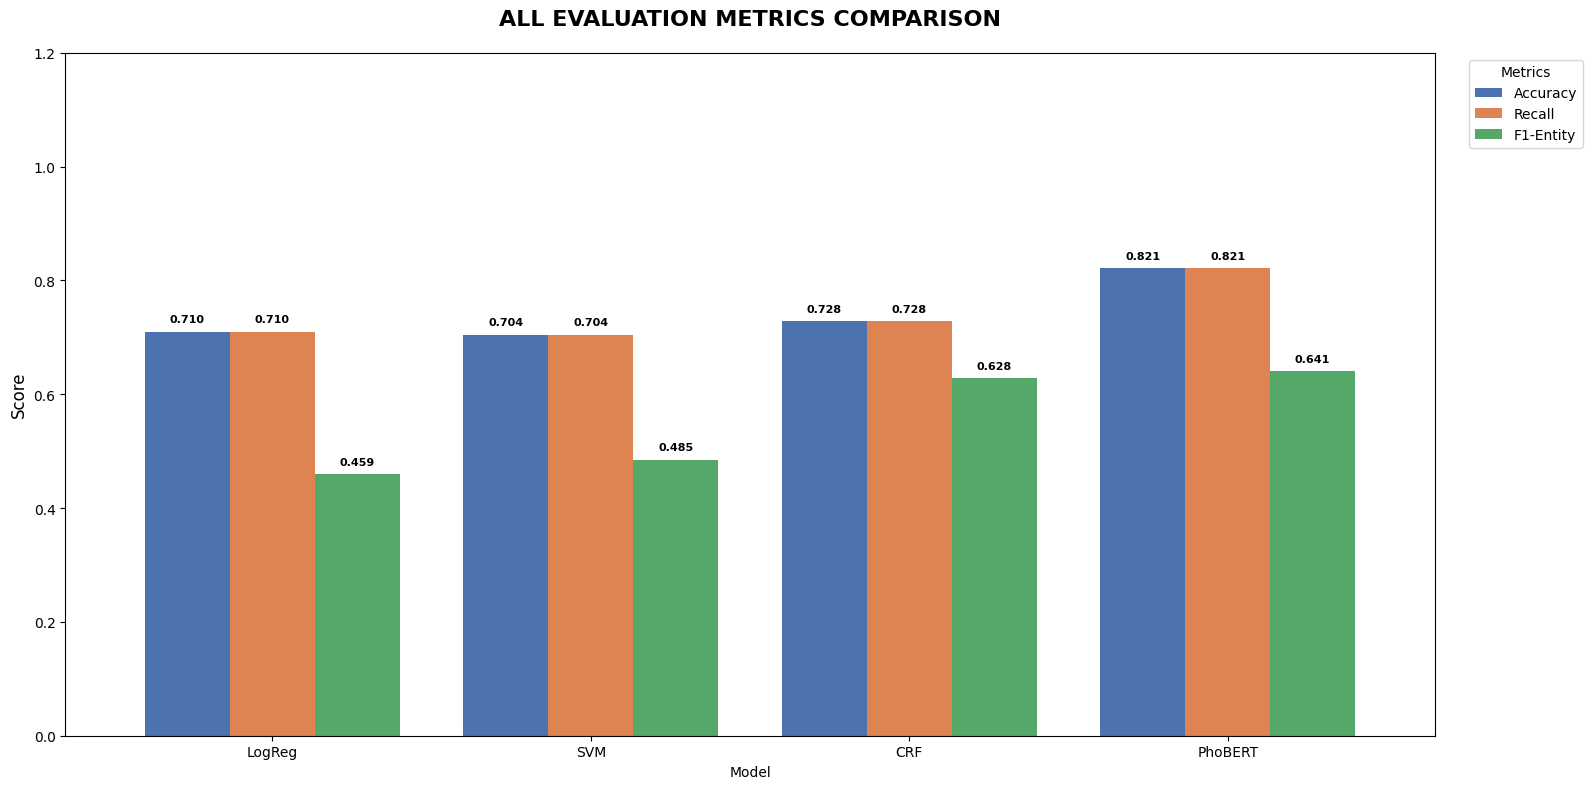

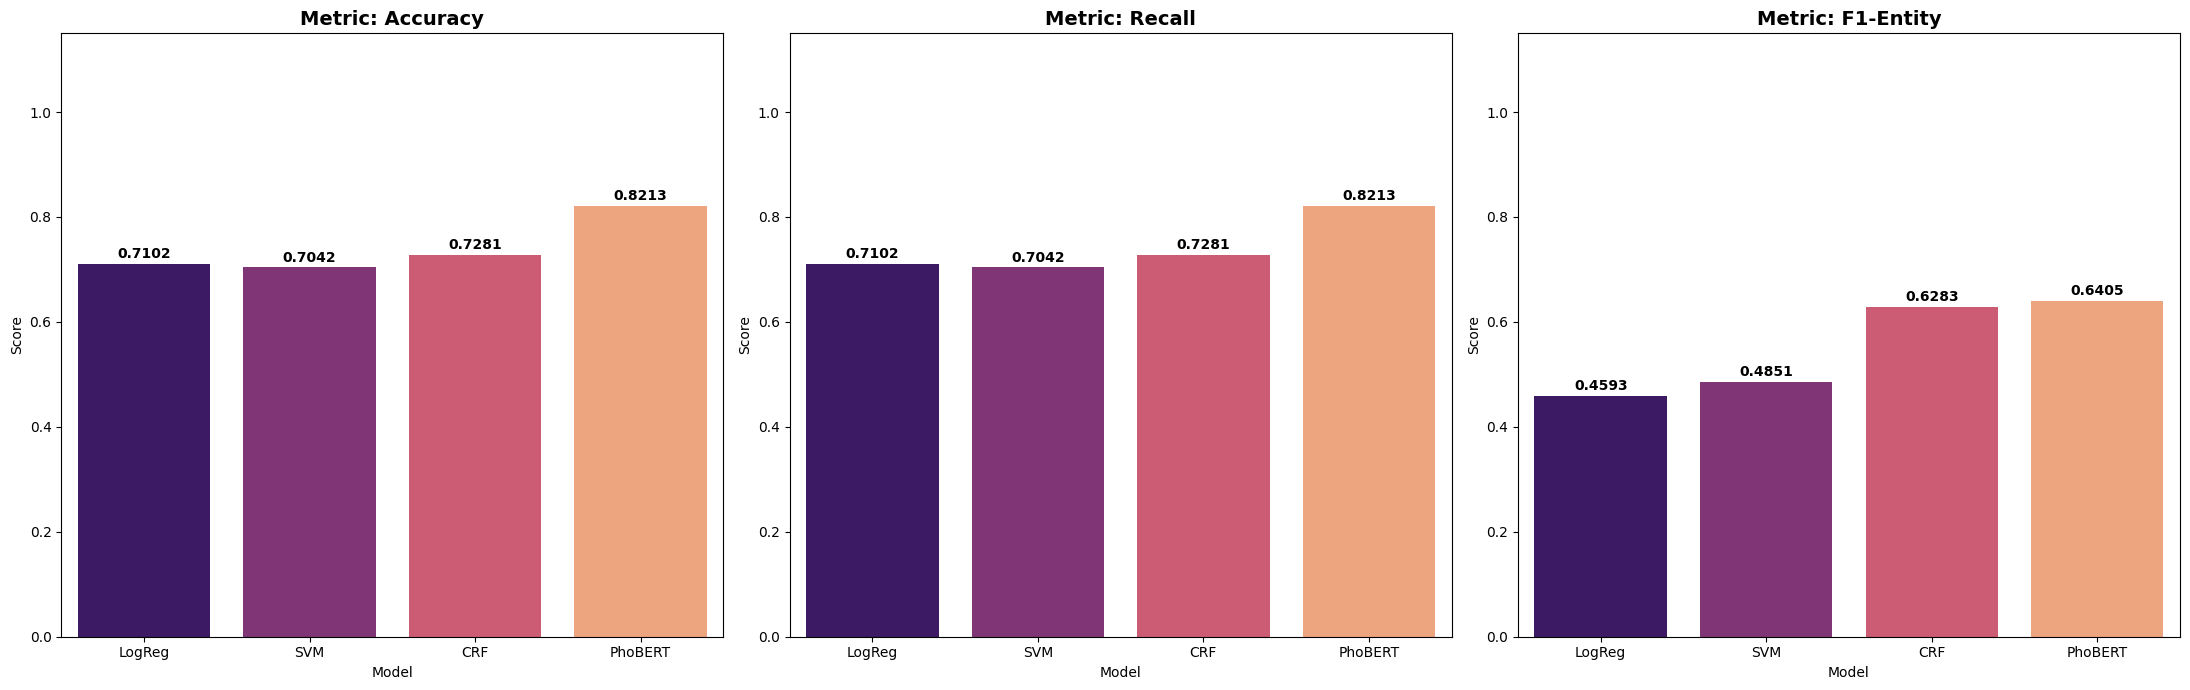

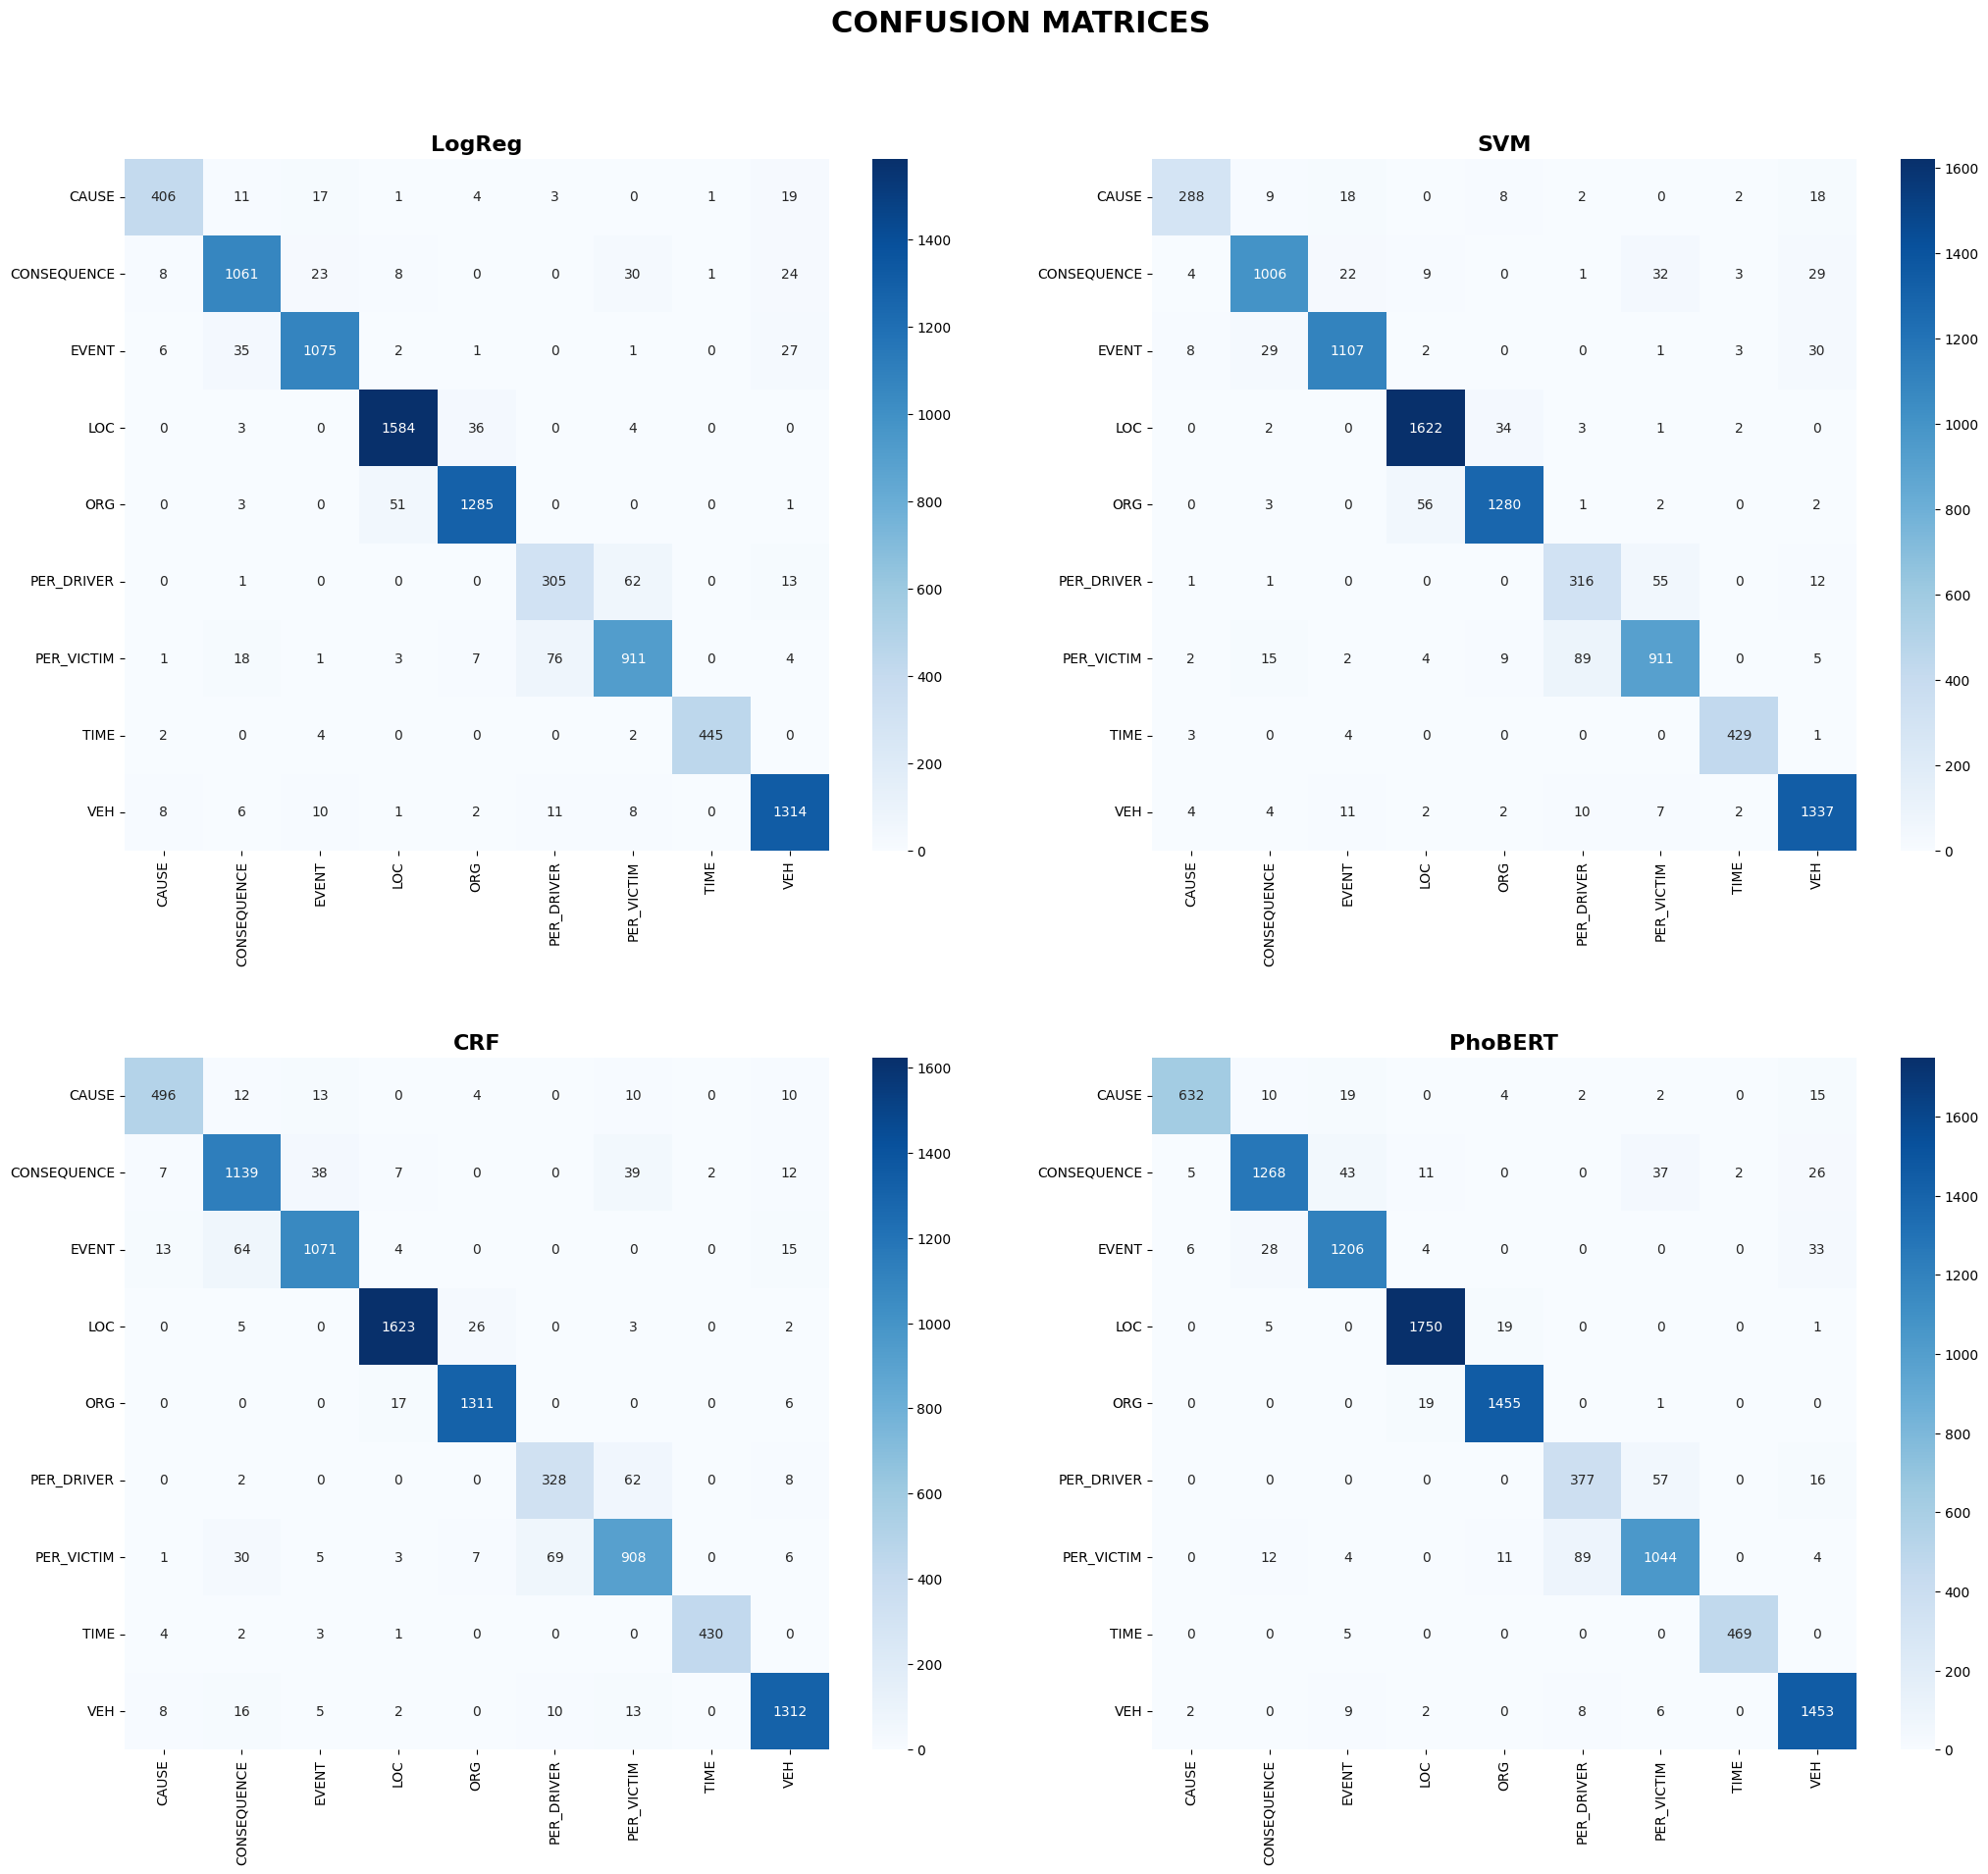

In [2]:
import os, json, random, joblib, torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModel, AutoModelForTokenClassification
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from seqeval.metrics import f1_score as seq_f1 


# 1. CẤU HÌNH HỆ THỐNG

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def seed_everything(seed=42):
    random.seed(seed); os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed); torch.manual_seed(seed)
    torch.cuda.manual_seed(seed); torch.cuda.manual_seed_all(seed)

seed_everything(42)

label_list = ["O", "B-LOC", "I-LOC", "B-VEH", "I-VEH", "B-EVENT", "I-EVENT",
              "B-PER_DRIVER", "I-PER_DRIVER", "B-PER_VICTIM", "I-PER_VICTIM",
              "B-ORG", "I-ORG", "B-CONSEQUENCE", "I-CONSEQUENCE", "B-TIME", "I-TIME", "B-CAUSE", "I-CAUSE"]
label2id = {l: i for i, l in enumerate(label_list)}
id2label = {i: l for i, l in enumerate(label_list)}
n_classes = len(label_list)


# 2. HÀM XỬ LÝ DỮ LIỆU & ĐẶC TRƯNG

def convert_data_label_studio_to_bio(json_path):
    if not os.path.exists(json_path): return []
    with open(json_path, 'r', encoding='utf-8') as f: data = json.load(f)
    processed_data = []
    for item in data:
        if 'data' not in item or 'text' not in item['data']: continue
        raw_text = item['data']['text']
        words = raw_text.split() 
        labels = ["O"] * len(words)
        word_spans, current_char = [], 0
        for w in words:
            start = raw_text.find(w, current_char)
            end = start + len(w)
            word_spans.append((start, end))
            current_char = end
        if 'annotations' in item:
            for annotation in item['annotations']:
                for result in annotation['result']:
                    if result['type'] == 'labels':
                        label_type = result['value']['labels'][0]
                        if label_type in ["Cause", "CAUSES"]: label_type = "CAUSE"
                        start_char, end_char = result['value']['start'], result['value']['end']
                        start_token_idx, end_token_idx = -1, -1
                        for idx, (w_start, w_end) in enumerate(word_spans):
                            if max(w_start, start_char) < min(w_end, end_char):
                                if start_token_idx == -1: start_token_idx = idx
                                end_token_idx = idx
                        if start_token_idx != -1:
                            b_label, i_label = f"B-{label_type}", f"I-{label_type}"
                            if b_label in label_list:
                                labels[start_token_idx] = b_label
                                for k in range(start_token_idx + 1, end_token_idx + 1): labels[k] = i_label
        if len(words) > 0:
            processed_data.append({"tokens": words, "ner_tags": [label2id[l] for l in labels], "ner_tags_str": labels})
    return processed_data

def clean_labels_for_cm(label_ids):
    return [id2label[lid].split('-')[1] if '-' in id2label[lid] else id2label[lid] for lid in label_ids]

def extract_features(dataset):
    X_flat, y_flat, X_seq, y_seq = [], [], [], []
    tk = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
    md = AutoModel.from_pretrained("vinai/phobert-base").to(DEVICE)
    for item in tqdm(dataset, desc="Vectorizing"):
        tkns, tags, tags_str = item['tokens'], item['ner_tags'], item['ner_tags_str']
        ins = tk(tkns, is_split_into_words=True, return_tensors="pt", padding=True, truncation=True, max_length=256).to(DEVICE)
        with torch.no_grad(): 
            outs = md(**ins); embs = outs.last_hidden_state[0].cpu().numpy()
        wids = [None]
        for i, w in enumerate(tkns):
            wids.extend([i] * len(tk.encode(w, add_special_tokens=False)))
        wids = (wids + [None])[:ins['input_ids'].shape[1]]
        sent_feats, sent_labels, seen = [], [], set()
        for idx, wid in enumerate(wids):
            if wid is not None and wid < len(tags) and wid not in seen and idx < len(embs):
                X_flat.append(embs[idx]); y_flat.append(tags[wid])
                sent_feats.append({f'd{i}': v for i, v in enumerate(embs[idx])})
                sent_labels.append(tags_str[wid]); seen.add(wid)
        if sent_feats: X_seq.append(sent_feats); y_seq.append(sent_labels)
    del md; torch.cuda.empty_cache()
    return np.array(X_flat), np.array(y_flat), X_seq, y_seq

def flat_to_seq(y_flat, y_seq_struct):
    y_seq, cursor = [], 0
    for sent in y_seq_struct:
        slc = y_flat[cursor:cursor+len(sent)]
        y_seq.append([id2label[i] if isinstance(i, (int, np.integer)) else i for i in slc])
        cursor += len(sent)
    return y_seq


# 3. CHƯƠNG TRÌNH CHÍNH

if __name__ == "__main__":
    DATA_PATH = "/kaggle/input/vietnamese-traffic-accident-ner-dataset/output.json"
    MODEL_DIR = "/kaggle/input/vn-traffic-ner-models"
    
    raw_data = convert_data_label_studio_to_bio(DATA_PATH)
    train_data, temp_data = train_test_split(raw_data, test_size=0.3, random_state=42)
    _, te = train_test_split(temp_data, test_size=0.77, random_state=42)
    
    X_ml, y_ml, X_crf, y_crf = extract_features(te)
    results_list, preds_cm = [], {}
    no_rel_id = label2id['O'] # ID của nhãn O

    # 3.2 Đánh giá LogReg, SVM, CRF
    configs = [('LogReg', 'logistic_regression.pkl'), ('SVM', 'svm_model.pkl'), ('CRF', 'crf_model.pkl')]
    for name, filename in configs:
        p = os.path.join(MODEL_DIR, filename)
        if os.path.exists(p):
            m = joblib.load(p)
            yp = m.predict(X_ml) if name != 'CRF' else [label2id[t] for s in m.predict(X_crf) for t in s]
            yt = y_ml if name != 'CRF' else [label2id[l] for s in y_crf for l in s]
            
            # LỌC NHÃN O ĐỂ TÍNH CHỈ SỐ
            yt_arr, yp_arr = np.array(yt), np.array(yp)
            mask = (yt_arr != no_rel_id)
            yt_filt, yp_filt = yt_arr[mask], yp_arr[mask]
            
            preds_cm[name] = (yt, yp)
            results_list.append({
                "Model": name, 
                "Accuracy": accuracy_score(yt_filt, yp_filt),
                "Recall": recall_score(yt_filt, yp_filt, average='weighted'),
                "F1-Entity": seq_f1(y_crf, flat_to_seq(yp, y_crf), mode='strict')
            })

    # 3.3 Đánh giá PhoBERT Fine-tuned
    p_ft = os.path.join(MODEL_DIR, "phobert_finetuned")
    if os.path.exists(p_ft):
        tk = AutoTokenizer.from_pretrained(p_ft, use_fast=False)
        ft_m = AutoModelForTokenClassification.from_pretrained(p_ft).to(DEVICE).eval()
        yt_all, yp_all, yt_s, yp_s = [], [], [], []
        for item in tqdm(te, desc="PhoBERT Evaluating"):
            ins = tk(item['tokens'], is_split_into_words=True, return_tensors="pt", padding=True, truncation=True, max_length=256).to(DEVICE)
            with torch.no_grad(): 
                outs = ft_m(**ins); preds = torch.argmax(outs.logits, dim=2)[0].cpu().numpy()
            wids = [None]
            for i, w in enumerate(item['tokens']):
                wids.extend([i] * len(tk.encode(w, add_special_tokens=False)))
            wids = (wids + [None])[:ins['input_ids'].shape[1]]
            seen, cur_p, cur_t = set(), [], []
            for idx, wid in enumerate(wids):
                if wid is not None and wid < len(item['ner_tags']) and wid not in seen and idx < len(preds):
                    yt_all.append(item['ner_tags'][wid]); yp_all.append(preds[idx])
                    cur_p.append(id2label[preds[idx]]); cur_t.append(item['ner_tags_str'][wid]); seen.add(wid)
            if cur_t: yt_s.append(cur_t); yp_s.append(cur_p)
            
        # --- LỌC NHÃN O ĐỂ TÍNH CHỈ SỐ ---
        yt_arr_pb, yp_arr_pb = np.array(yt_all), np.array(yp_all)
        mask_pb = (yt_arr_pb != no_rel_id)
        yt_filt_pb, yp_filt_pb = yt_arr_pb[mask_pb], yp_arr_pb[mask_pb]

        preds_cm['PhoBERT'] = (yt_all, yp_all)
        results_list.append({
            "Model": "PhoBERT", 
            "Accuracy": accuracy_score(yt_filt_pb, yp_filt_pb),
            "Recall": recall_score(yt_filt_pb, yp_filt_pb, average='weighted'),
            "F1-Entity": seq_f1(yt_s, yp_s, mode='strict')
        })

  
    # 4. HIỂN THỊ & TRỰC QUAN HÓA
 
    eval_df = pd.DataFrame(results_list).set_index("Model")
    print("\n BẢNG TỔNG HỢP\n", tabulate(eval_df, headers='keys', tablefmt='pretty', floatfmt=".4f"))

    # 4.1 Biểu đồ tổng hợp
    custom_colors = ['#4C72B0', '#DD8452', '#55A868']
    ax = eval_df.plot(kind='bar', figsize=(16, 8), rot=0, width=0.8, color=custom_colors)
    plt.title("ALL EVALUATION METRICS COMPARISON", fontsize=16, fontweight='bold', pad=20)
    plt.ylabel("Score", fontsize=12); plt.ylim(0, 1.2); plt.legend(title="Metrics", bbox_to_anchor=(1.02, 1), loc='upper left')
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=8, fontweight='bold')
    plt.tight_layout(); plt.show()

    # 4.2 Biểu đồ riêng từng chỉ số
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
    axes = axes.flatten()
    for i, metric in enumerate(eval_df.columns):
        sns.barplot(x=eval_df.index, y=eval_df[metric], ax=axes[i], palette='magma', hue=eval_df.index, legend=False)
        axes[i].set_title(f"Metric: {metric}", fontsize=14, fontweight='bold')
        axes[i].set_ylim(0, 1.15); axes[i].set_ylabel("Score")
        for p in axes[i].patches:
            if p.get_height() > 0:
                axes[i].annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, fontweight='bold')
    plt.tight_layout(); plt.show()

    # Confusion Matrix
    fig, axes = plt.subplots(2, 2, figsize=(22, 20))
    axes = axes.flatten()
    for i, (name, (yt, yp)) in enumerate(preds_cm.items()):
        yt_c, yp_c = clean_labels_for_cm(yt), clean_labels_for_cm(yp)
        lbls = sorted(list(set(yt_c) | set(yp_c)))
        if 'O' in lbls: lbls.remove('O')
        sns.heatmap(confusion_matrix(yt_c, yp_c, labels=lbls), 
                    annot=True, fmt='d', cmap='Blues', xticklabels=lbls, yticklabels=lbls, ax=axes[i], cbar=True)
        axes[i].set_title(f"{name}", fontweight='bold', fontsize=16)
        axes[i].set_xticklabels(lbls, rotation=90, ha='center', fontsize=10)
        axes[i].set_yticklabels(lbls, rotation=0, fontsize=10)
    plt.suptitle("CONFUSION MATRICES", fontsize=22, fontweight='bold', y=0.98)
    plt.tight_layout(pad=5.0); plt.show()